<a href="https://colab.research.google.com/github/SAISKAND/Python-projects/blob/main/ML_Algorithms_scratch/knnfunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Computing euclidean distnace
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

#Predicting the class using the K nearest neighbours
def knn_predict(train_data, test_point, k):
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(train_data.iloc[i, :-1], test_point)
        distances.append((dist, train_data.iloc[i, -1], i))  # Append tuple of (distance, class, index)
    distances.sort()  # Sort distances
    neighbors = distances[:k]  # Select k nearest neighbors
    counts = {}  # Dictionary to count occurrences of each class
    for neighbor in neighbors:
        if neighbor[1] in counts:
            counts[neighbor[1]] += 1
        else:
            counts[neighbor[1]] = 1
    # Find the class with the most occurrences
    predicted_class = max(counts, key=counts.get)
    return predicted_class, neighbors

def plot_testdata(ax,df):
  ax.scatter(df[df['class'] == 0]['X axis'], df[df['class'] == 0]['Y axis'], color='blue', label='Class 0')
  ax.scatter(df[df['class'] == 1]['X axis'], df[df['class'] == 1]['Y axis'], color='red', label='Class 1')
  ax.set_xlabel('X axis')
  ax.set_ylabel('Y axis')
  ax.legend()
  ax.set_title('KNN Visualization')
  ax.grid()


Predicted class for test point [8, 20]: 0


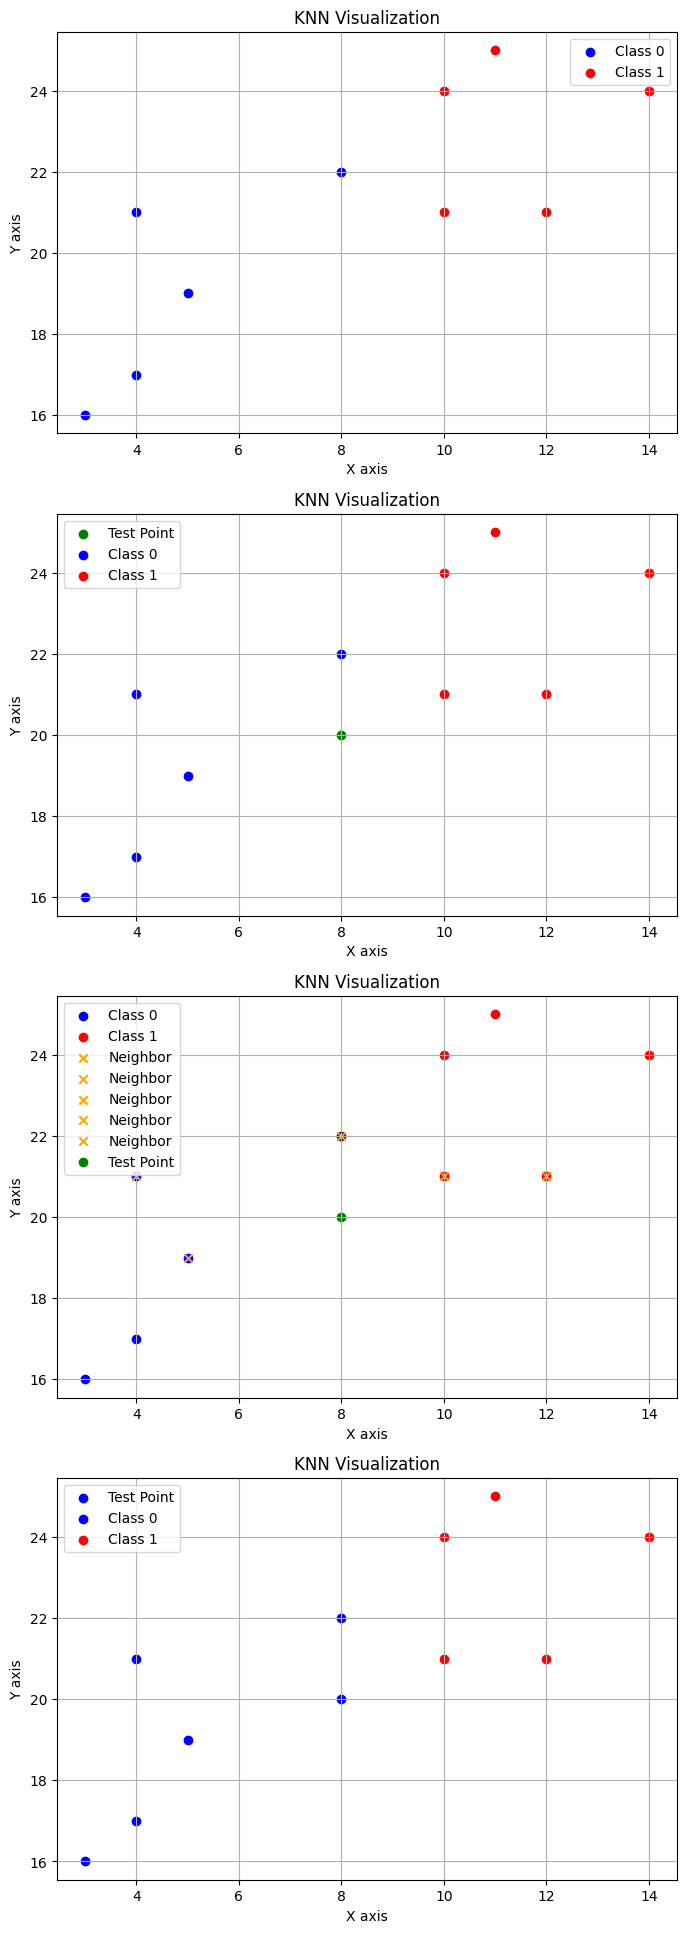

In [ ]:
# Create DataFrame
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
x_test, y_test = 8, 20
test_point = [x_test, y_test]
data = {'X axis': x, 'Y axis': y, 'class': classes}
df = pd.DataFrame(data)

# without test point

fig,axes=plt.subplots(4,1,figsize=(8, 24))
plot_testdata(axes[0],df)

# Step 2: Plot data with test point
axes[1].scatter(test_point[0], test_point[1], color='green', label='Test Point')
plot_testdata(axes[1],df)
# Step 3: Plot data with test point and assigned class
k = 5
predicted_class, neighbors = knn_predict(df, test_point, k)
plot_testdata(axes[2],df)
if neighbors:
        for neighbor in neighbors:
            axes[2].scatter(df.iloc[neighbor[2]]['X axis'], df.iloc[neighbor[2]]['Y axis'], color='orange', label='Neighbor', marker='x')
axes[2].scatter(test_point[0], test_point[1], color='green', label='Test Point')
axes[2].legend()

if predicted_class is not None:
        if predicted_class == 0:
            axes[3].scatter(test_point[0], test_point[1], color='blue', label='Test Point')
        elif predicted_class == 1:
            axes[3].scatter(test_point[0], test_point[1], color='red', label='Test Point')
else:
  axes[3].scatter(test_point[0], test_point[1], color='green', label='Test Point')
plot_testdata(axes[3],df)
print("Predicted class for test point {}: {}".format(test_point, predicted_class))